# Results Analysis: Distributions

## Packages

In [1]:
import pandas as pd
import numpy as np

import ast

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

%matplotlib inline
mpl.rcParams['figure.dpi']= 300
#plt.style.use('dark_background')

import warnings
warnings.filterwarnings("ignore")

## Load data

In [2]:
names_topics = pd.read_excel('../results/names_topics.xlsx')
names = pd.read_excel('../results/Name_data.xlsx')
topics = pd.read_csv('../results/paragraph_topic.csv')
profiles = pd.read_csv('../data/profile_names_roles.csv')
# names_with_topics = names.merge(topics, on='paragraph_index', how='left')
# names_with_topics

In [3]:
# Define the topic labels dictionary
topic_labels = {
    1: 'Family & Daily Life',
    2: 'K-25 program',
    3: 'Chicago Pile 1',
    4: 'Hanford site',
    5: 'B Reactor',
    6: 'Cold War & Politics',
    7: 'Hiroshima & Nagasaki bombings'
}

---

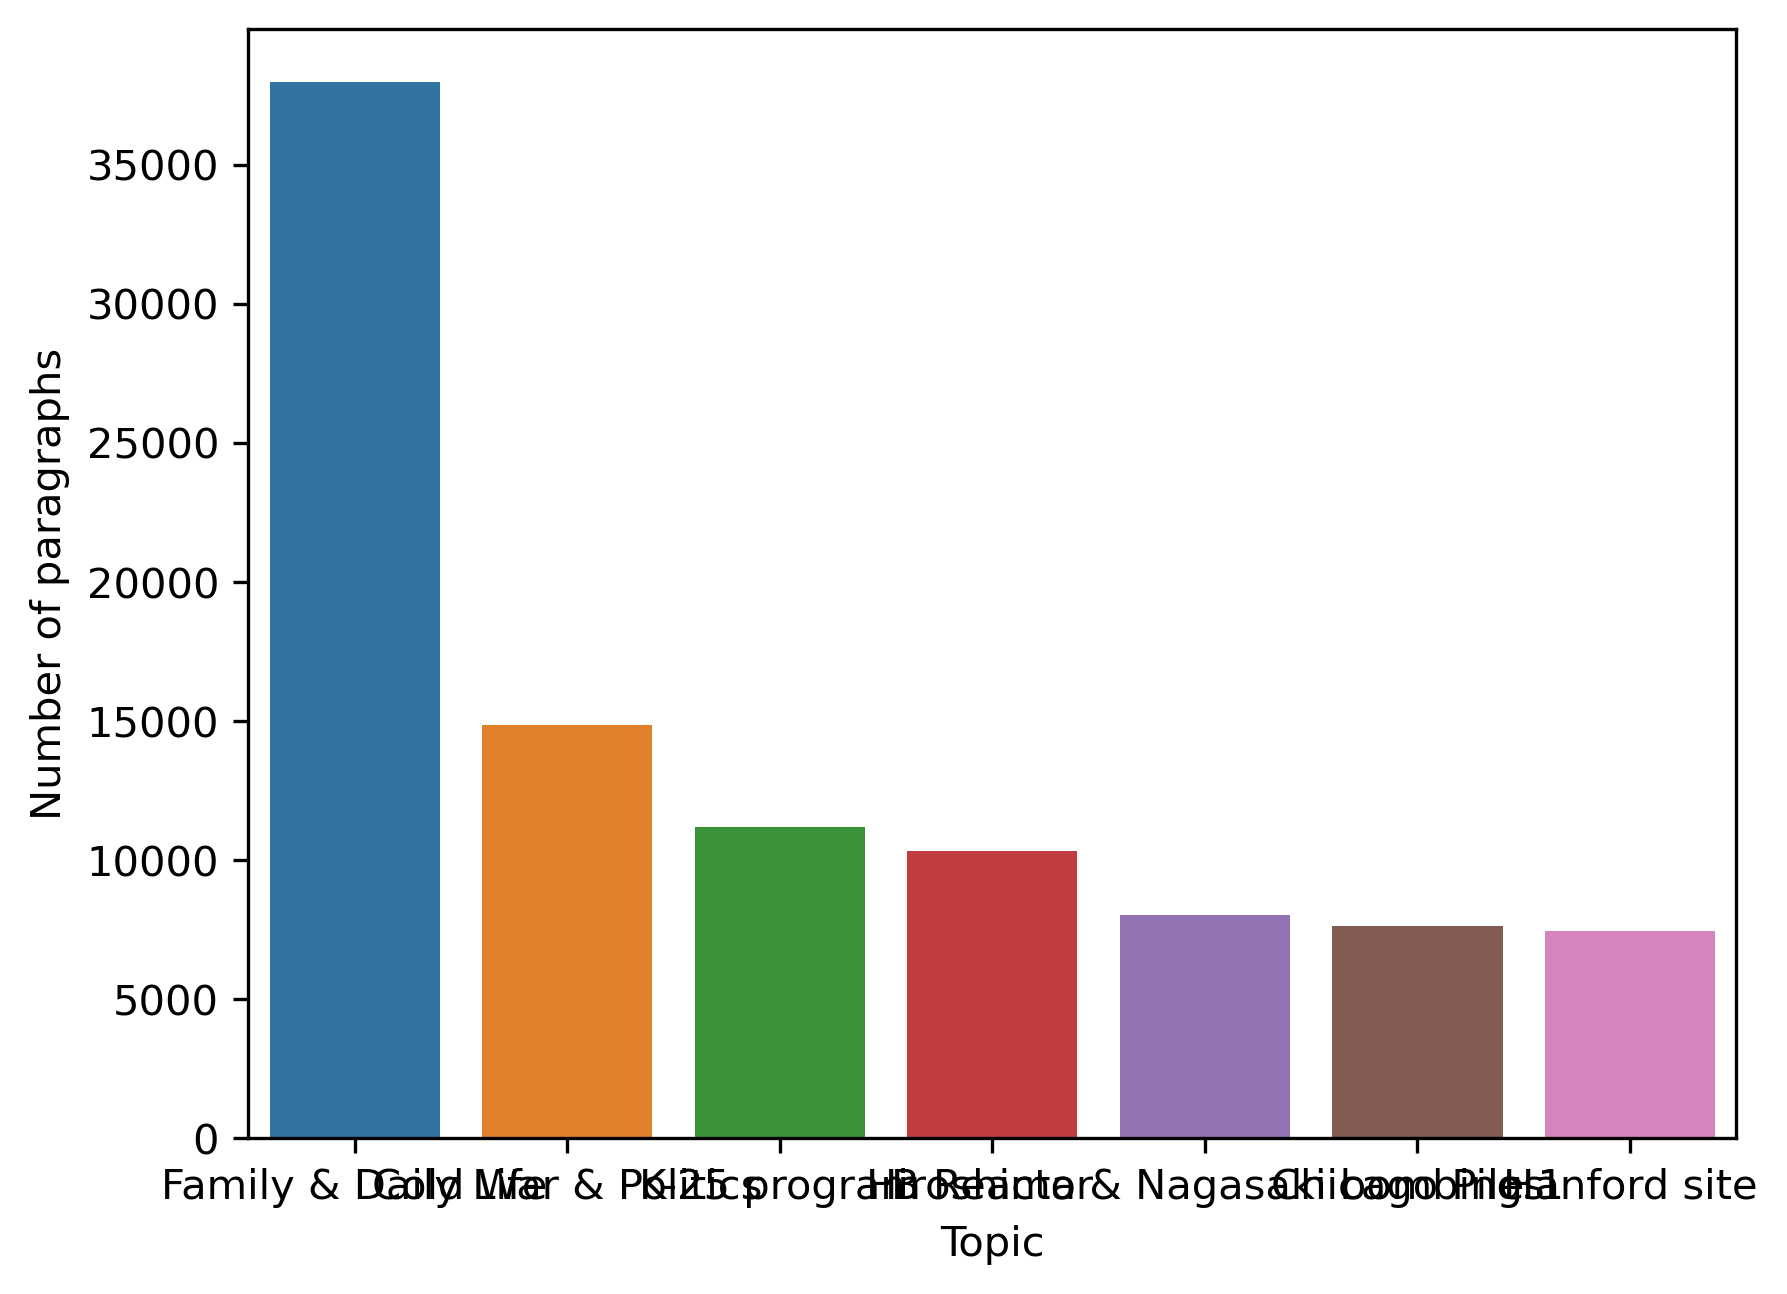

In [4]:
sns.barplot(x=topics['topic_7'].value_counts().index.map(topic_labels),
            y=topics['topic_7'].value_counts().values, palette=sns.color_palette('tab10', 7))
plt.xlabel('Topic')
plt.ylabel('Number of paragraphs')
plt.show()

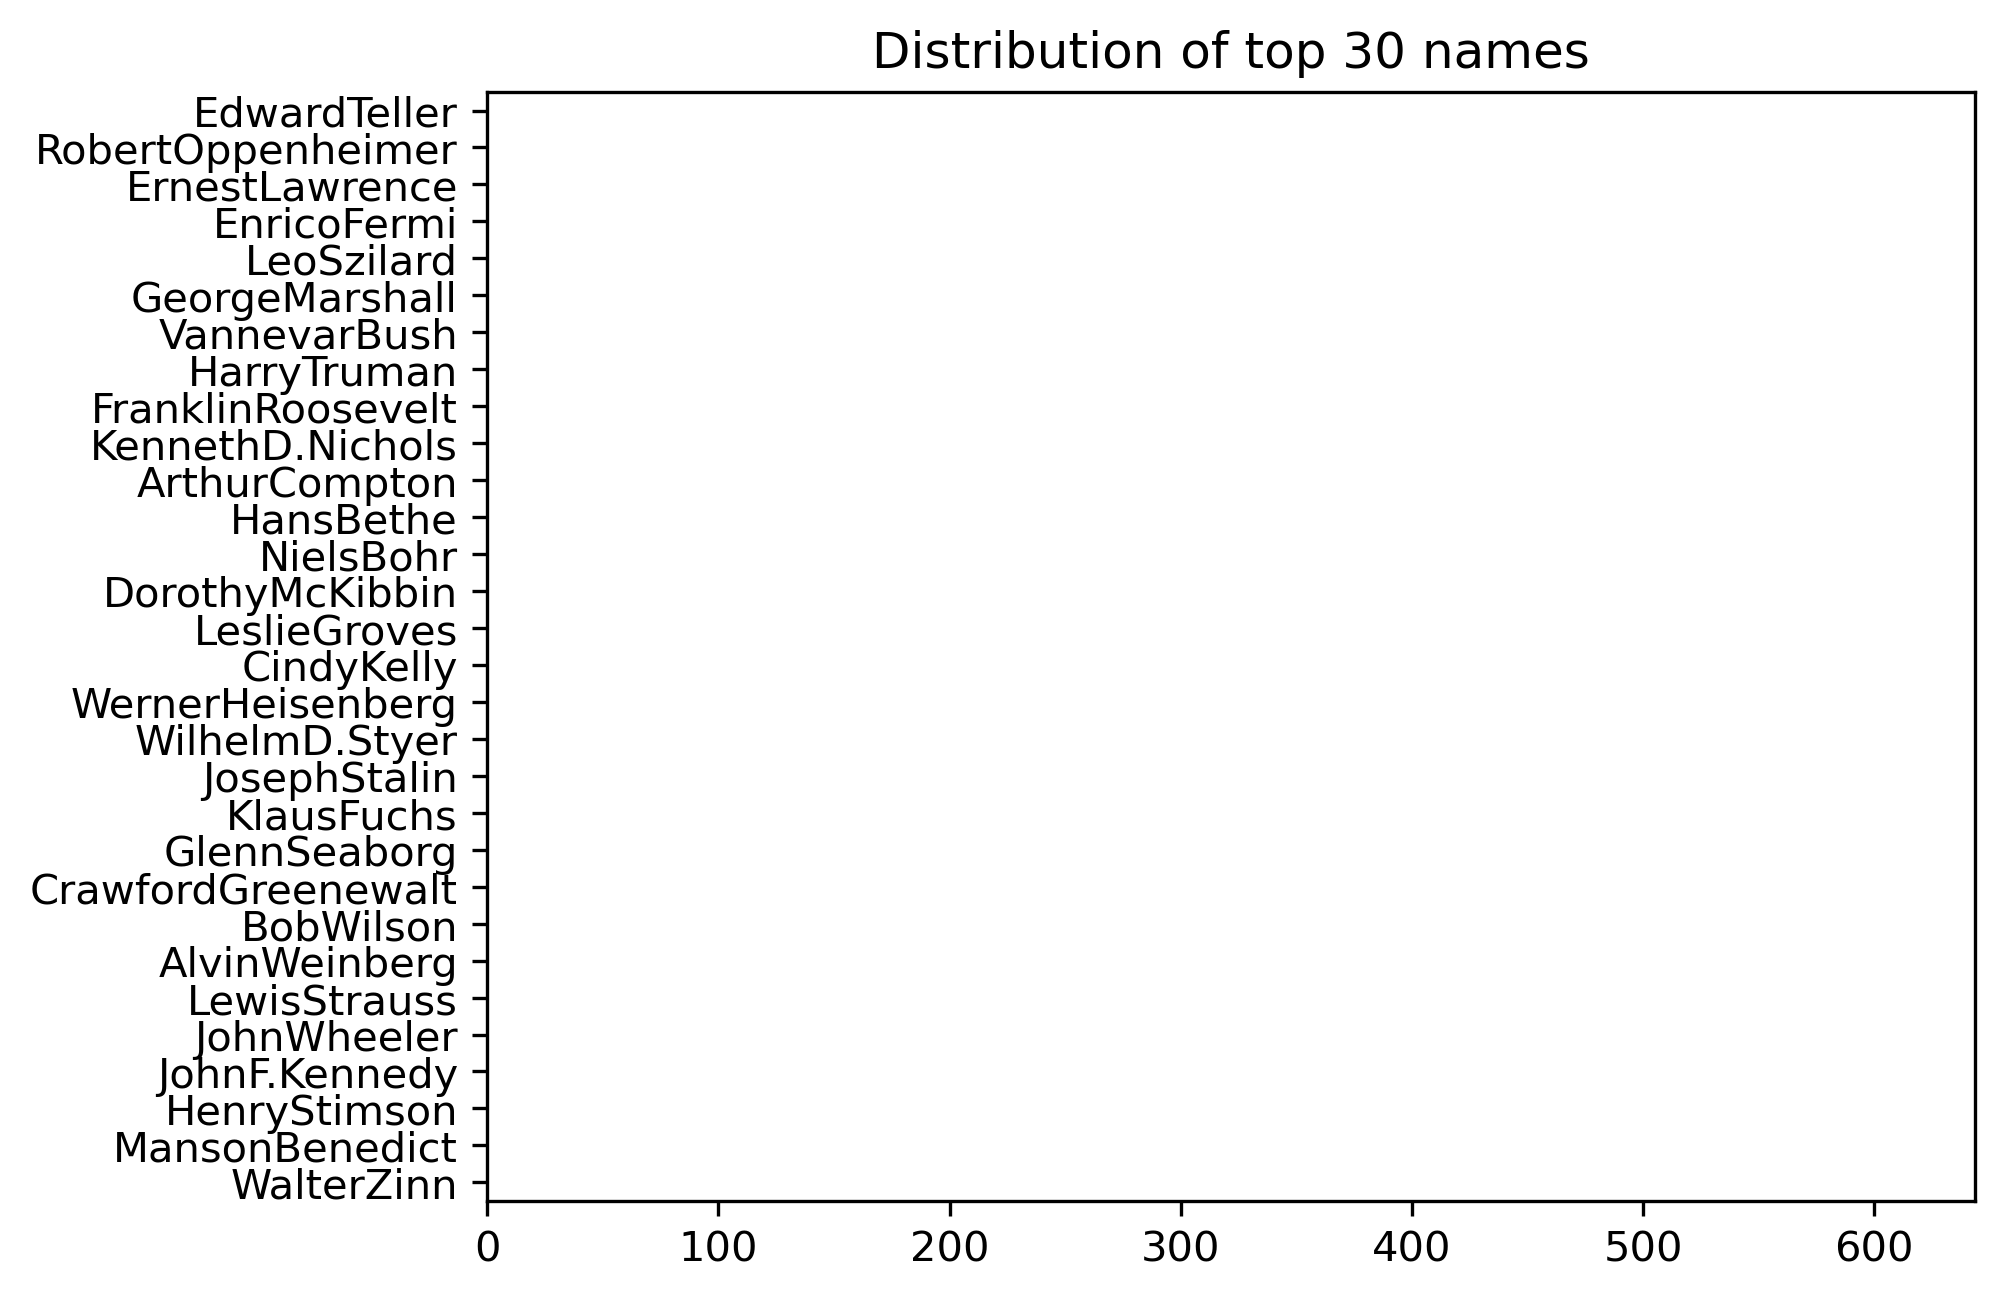

In [5]:
sns.barplot(x=names['Name_Extracted_Cleaned'].value_counts().nlargest(30).values,y=names['Name_Extracted_Cleaned'].value_counts().nlargest(30).index, orient='h', color='white')
plt.title("Distribution of top 30 names")
plt.show()

---

In [6]:
names_topics.head()

interviewee_x                                           sentence  \
0   Donald Ames  He did not work on radioactivity, but he was e...   
1   Donald Ames  [Gilbert Newton] Lewis out there on acids and ...   
2   Donald Ames                                          [John] J.   
3   Donald Ames  The other secretary was to take notes on whate...   
4   Donald Ames  Well, he didn’t, I mean his graduate student a...   

                                           paragraph  paragraph_index  \
0  Now, as far as his treatment of the people. Be...            98173   
1  Now, as far as his treatment of the people. Be...            98173   
2  Now, as far as his treatment of the people. Be...            98173   
3  He had two secretaries. One secretary was for ...            98171   
4  Ames Well yeah, he discovered it. Well, he did...            98169   

                 name  frequency  topic_7  topic_30  topic_90  
0      ErnestLawrence        336        3        10        25  
1  GilbertNewtonLewis          1        3        10        25  
2              JohnJ.          1        3        10        25  
3        GlennSeaborg        100        2        21        41  
4       JohnF.Kennedy         84        3         5        59

In [7]:
names_topics['topic_7'].value_counts()

6    5255
1    4928
2    3138
3    2948
7    1694
5     988
4     966
Name: topic_7, dtype: int64

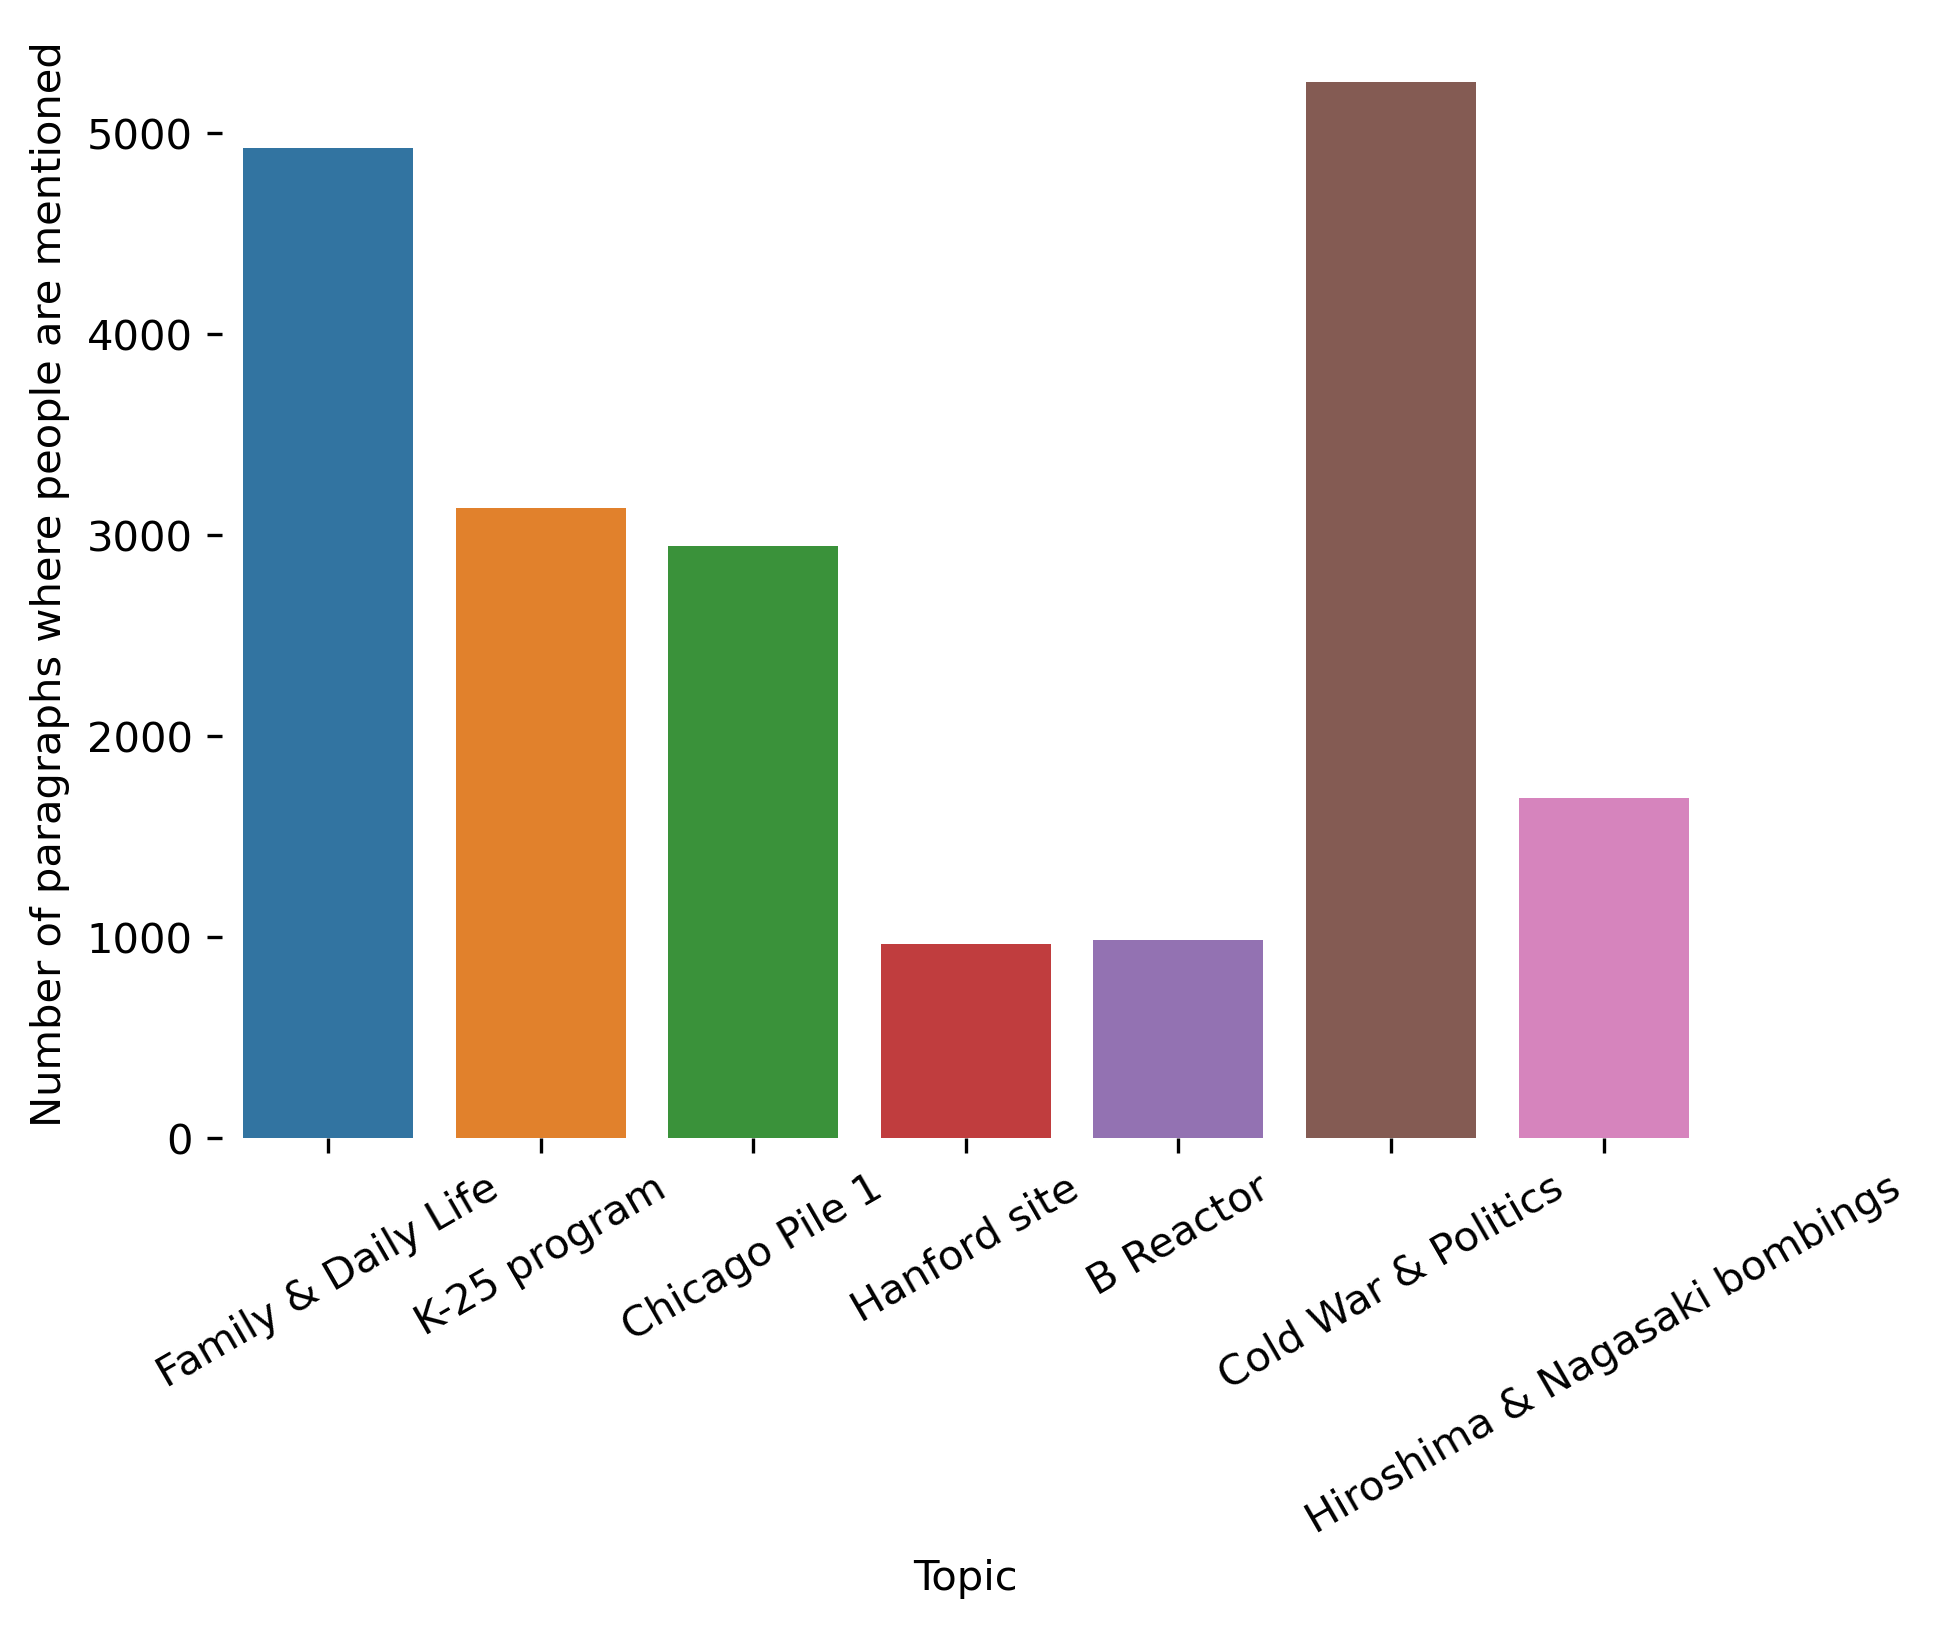

In [8]:
sns.barplot(x=names_topics['topic_7'].value_counts().index.map(topic_labels),
            y=names_topics['topic_7'].value_counts().values, palette=sns.color_palette('tab10', 7),
            order=topic_labels.values(),)
plt.xlabel('Topic')
plt.ylabel('Number of paragraphs where people are mentioned')
plt.box(False)
plt.tick_params(axis='x', rotation=30)
plt.show()

In [9]:
names_topics = names_topics[names_topics['name'] != 'CindyKelly']

In [10]:
top_names = names_topics.groupby('name').size().nlargest(50).index
top_names

Index(['EdwardTeller', 'RobertOppenheimer', 'ErnestLawrence', 'EnricoFermi',
       'LeoSzilard', 'GeorgeMarshall', 'VannevarBush', 'HarryTruman',
       'FranklinRoosevelt', 'ArthurCompton', 'KennethD.Nichols', 'HansBethe',
       'NielsBohr', 'DorothyMcKibbin', 'LeslieGroves', 'WernerHeisenberg',
       'WilhelmD.Styer', 'JosephStalin', 'KlausFuchs', 'GlennSeaborg',
       'CrawfordGreenewalt', 'BobWilson', 'AlvinWeinberg', 'LewisStrauss',
       'JohnWheeler', 'HenryStimson', 'JohnF.Kennedy', 'MansonBenedict',
       'AlbertEinstein', 'WalterZinn', 'DobieKeith', 'GeorgeKistiakowsky',
       'JamesChadwick', 'RichardFeynman', 'JohnDunning', 'FrankOppenheimer',
       'RogerWilliams', 'LouisSlotin', 'PaulTibbets', 'OttoHahn',
       'RobertSerber', 'RonaldReagan', 'BobLewis', 'TomFoulds', 'JoanHinton',
       'HaroldUrey', 'RichardTolman', 'NormanHilberry', 'MikeDevice',
       'JamesMarshall'],
      dtype='object', name='name')

In [11]:
grouped_by_names_topics = names_topics.groupby(['name', 'topic_7']).size().reset_index()
grouped_by_names_topics.rename(columns={'topic_7':'Topic'}, inplace=True)
pivot_names_topics = grouped_by_names_topics.pivot(index='name', columns='Topic', values=0).fillna(0).astype(int)
pivot_names_topics.rename(columns=topic_labels, inplace=True)
pivot_names_topics = pivot_names_topics.loc[top_names]
pivot_names_topics

Topic               Family & Daily Life  K-25 program  Chicago Pile 1  \
name                                                                    
EdwardTeller                         40             8              23   
RobertOppenheimer                    62             4               9   
ErnestLawrence                       23           191              38   
EnricoFermi                          10             6             218   
LeoSzilard                            3             6             176   
GeorgeMarshall                        0            82               0   
VannevarBush                          2           152               1   
HarryTruman                           4             5               5   
FranklinRoosevelt                    15            26              28   
ArthurCompton                         5            44             103   
KennethD.Nichols                      1           155               0   
HansBethe                            16             0              15   
NielsBohr                             7             1              59   
DorothyMcKibbin                     137             1               0   
LeslieGroves                         24            58               9   
WernerHeisenberg                      4             0              48   
WilhelmD.Styer                       12            98               4   
JosephStalin                          2             0               0   
KlausFuchs                            7             1               0   
GlennSeaborg                          1             4              57   
CrawfordGreenewalt                   10            14              58   
BobWilson                            23             2               9   
AlvinWeinberg                         6             0              54   
LewisStrauss                          1             0               0   
JohnWheeler                           2             0              51   
HenryStimson                          3            19               0   
JohnF.Kennedy                        10             9              15   
MansonBenedict                       17            42               7   
AlbertEinstein                        0             1              46   
WalterZinn                            9            11              49   
DobieKeith                            3            72               0   
GeorgeKistiakowsky                   17             3              14   
JamesChadwick                        11             4               1   
RichardFeynman                       17             2              10   
JohnDunning                           4            57               9   
FrankOppenheimer                     15             0               0   
RogerWilliams                         6            49               4   
LouisSlotin                          19             0              23   
PaulTibbets                          12             1               0   
OttoHahn                              0             0              30   
RobertSerber                          6             0               1   
RonaldReagan                          9             2               1   
BobLewis                              6             3               1   
TomFoulds                             3             0               4   
JoanHinton                           28             1              25   
HaroldUrey                            3            24              26   
RichardTolman                        10            16               4   
NormanHilberry                        7            15              34   
MikeDevice                            3             3               0   
JamesMarshall                         3            37               0   

Topic               Hanford site  B Reactor  Cold War & Politics  \
name                                                               
EdwardTeller                   0          7                  532   

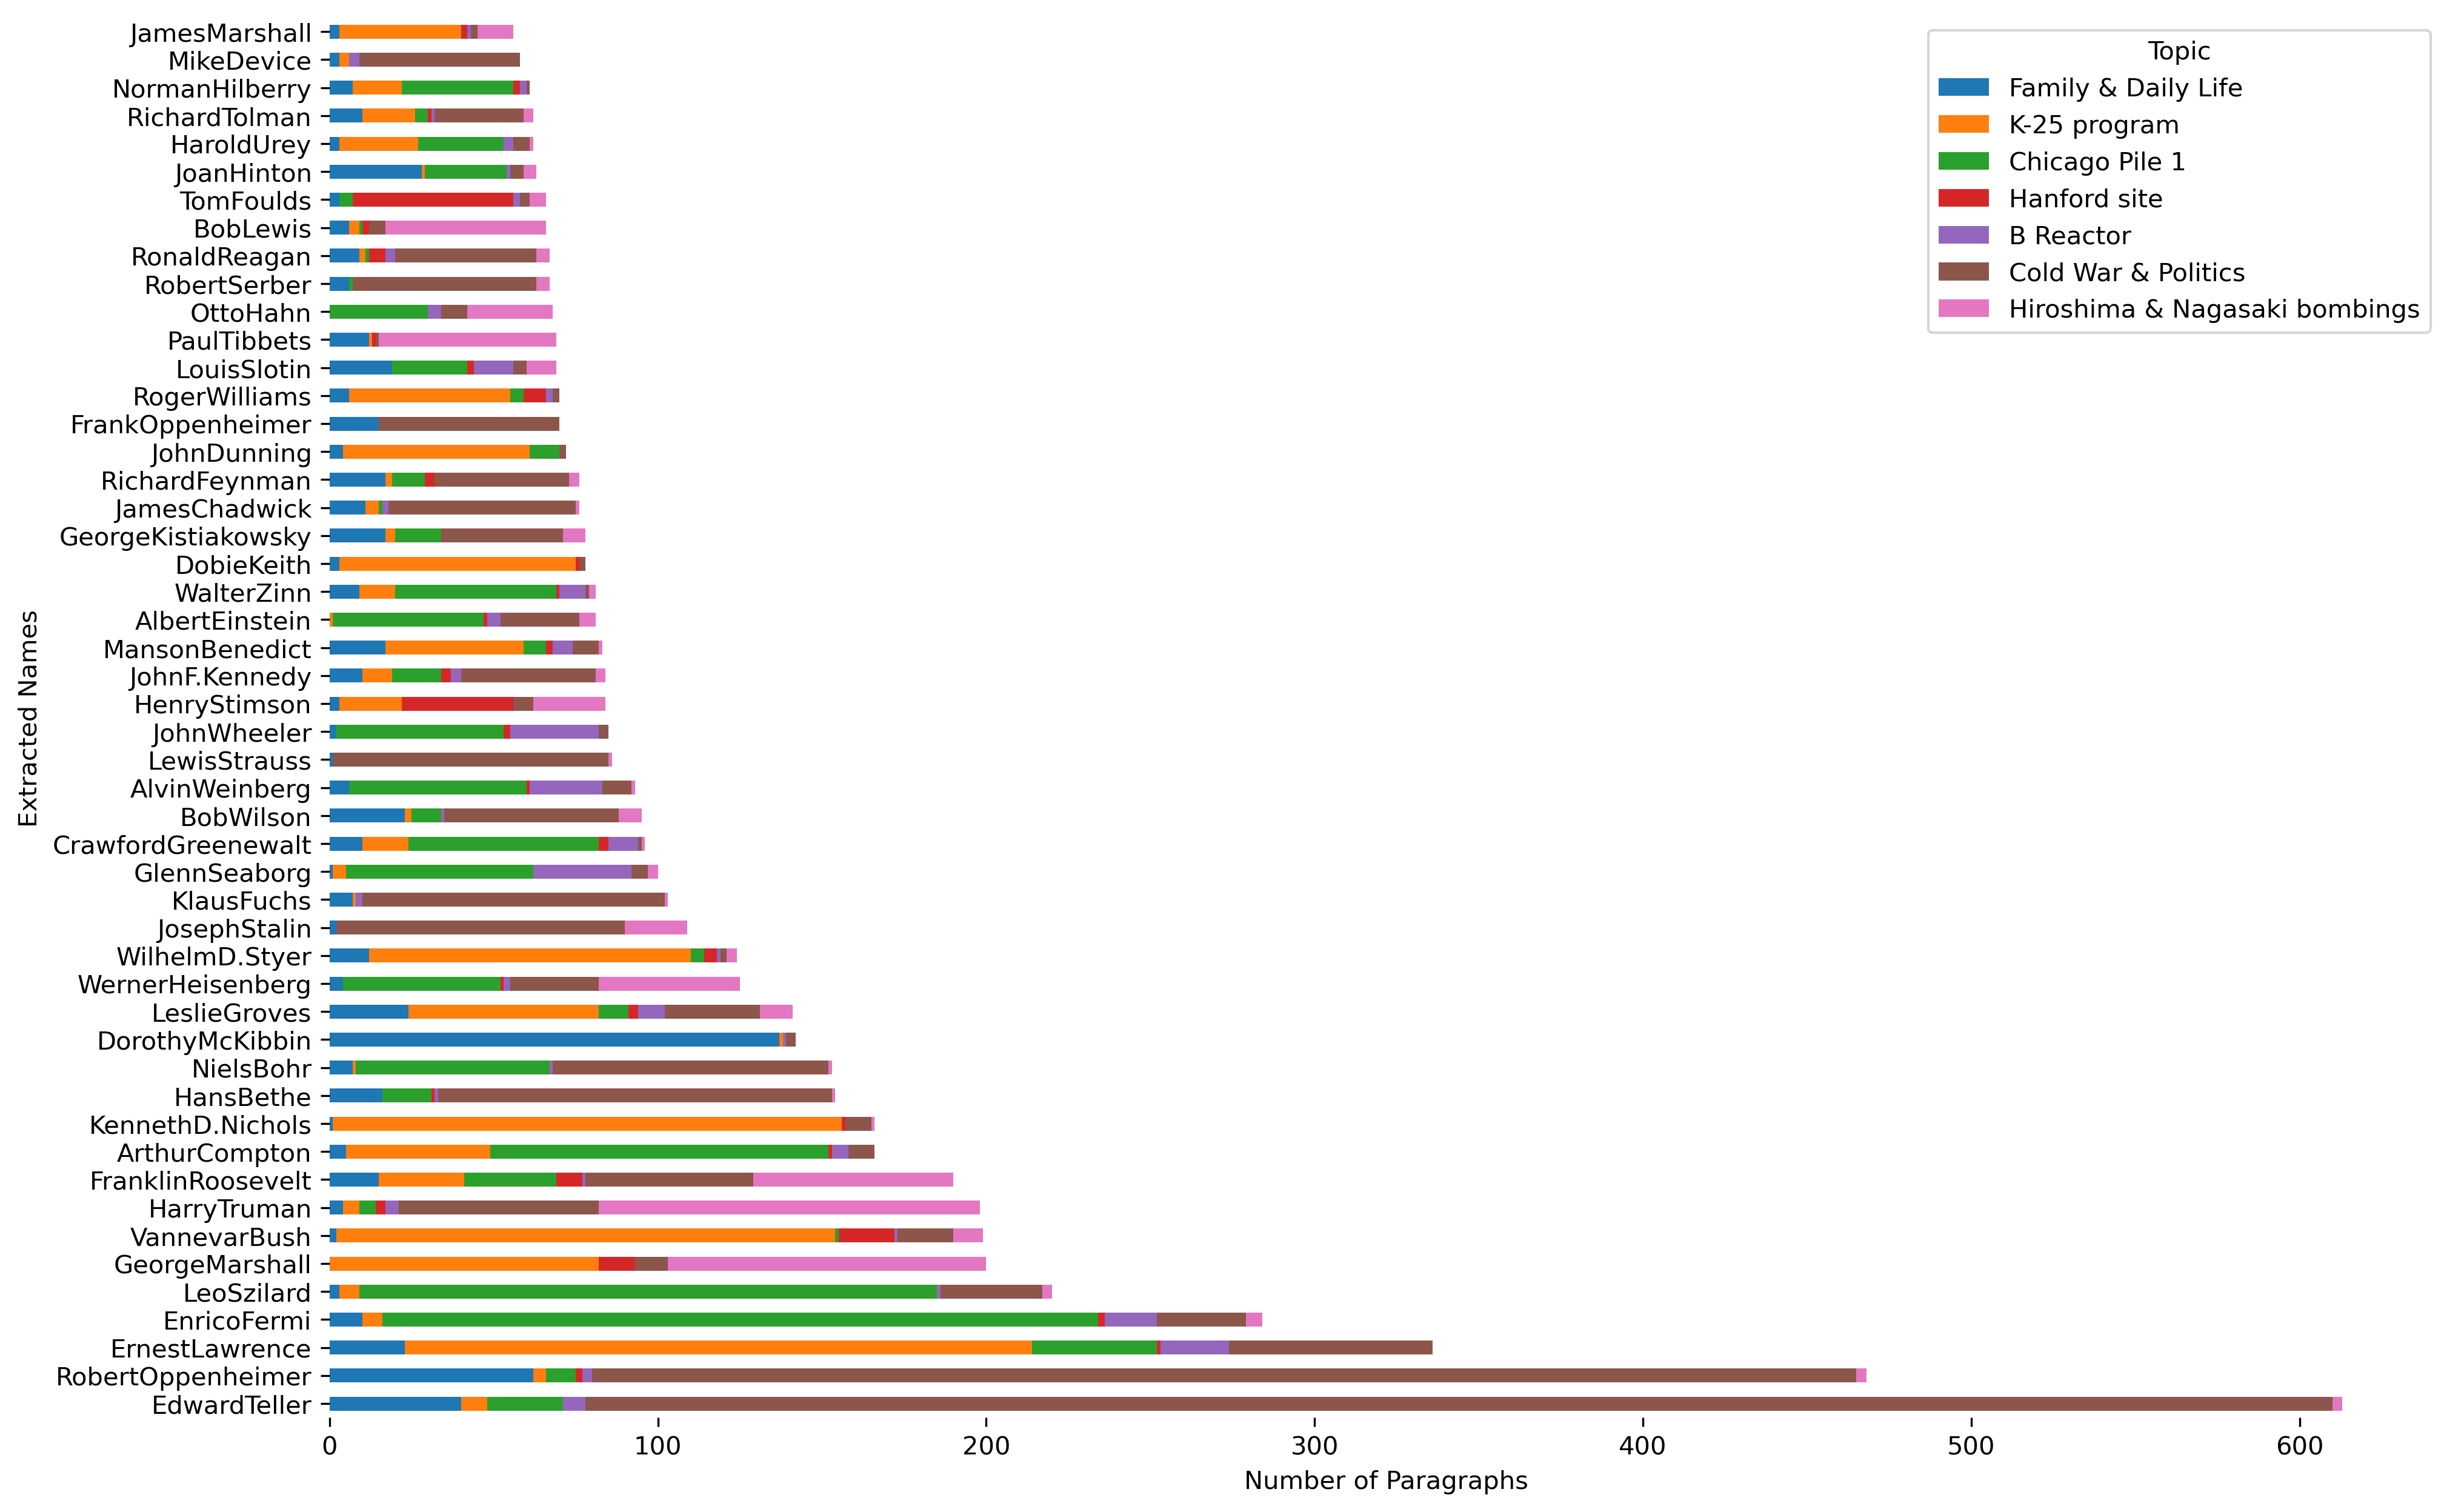

In [12]:
# Create a stacked horizontal bar plot
pivot_names_topics.plot.barh(stacked=True, figsize=(15, 10), cmap=ListedColormap(sns.color_palette('tab10', 7)))

# Set plot labels and title
plt.xlabel('Number of Paragraphs')
plt.ylabel('Extracted Names')
# plt.title('Top 20 Extracted Names')

plt.box(False)

# Show the plot
plt.show()

In [13]:
# Create an empty dictionary to store the top names for each topic
top_names_by_topic = {}

# Iterate over each 'topic_7'
for topic in pivot_names_topics.columns:
    # Get the top 20 names for the current topic
    top_names = pivot_names_topics[topic].nlargest(20).index.tolist()
    
    # Store the top names in the dictionary
    top_names_by_topic[topic] = top_names

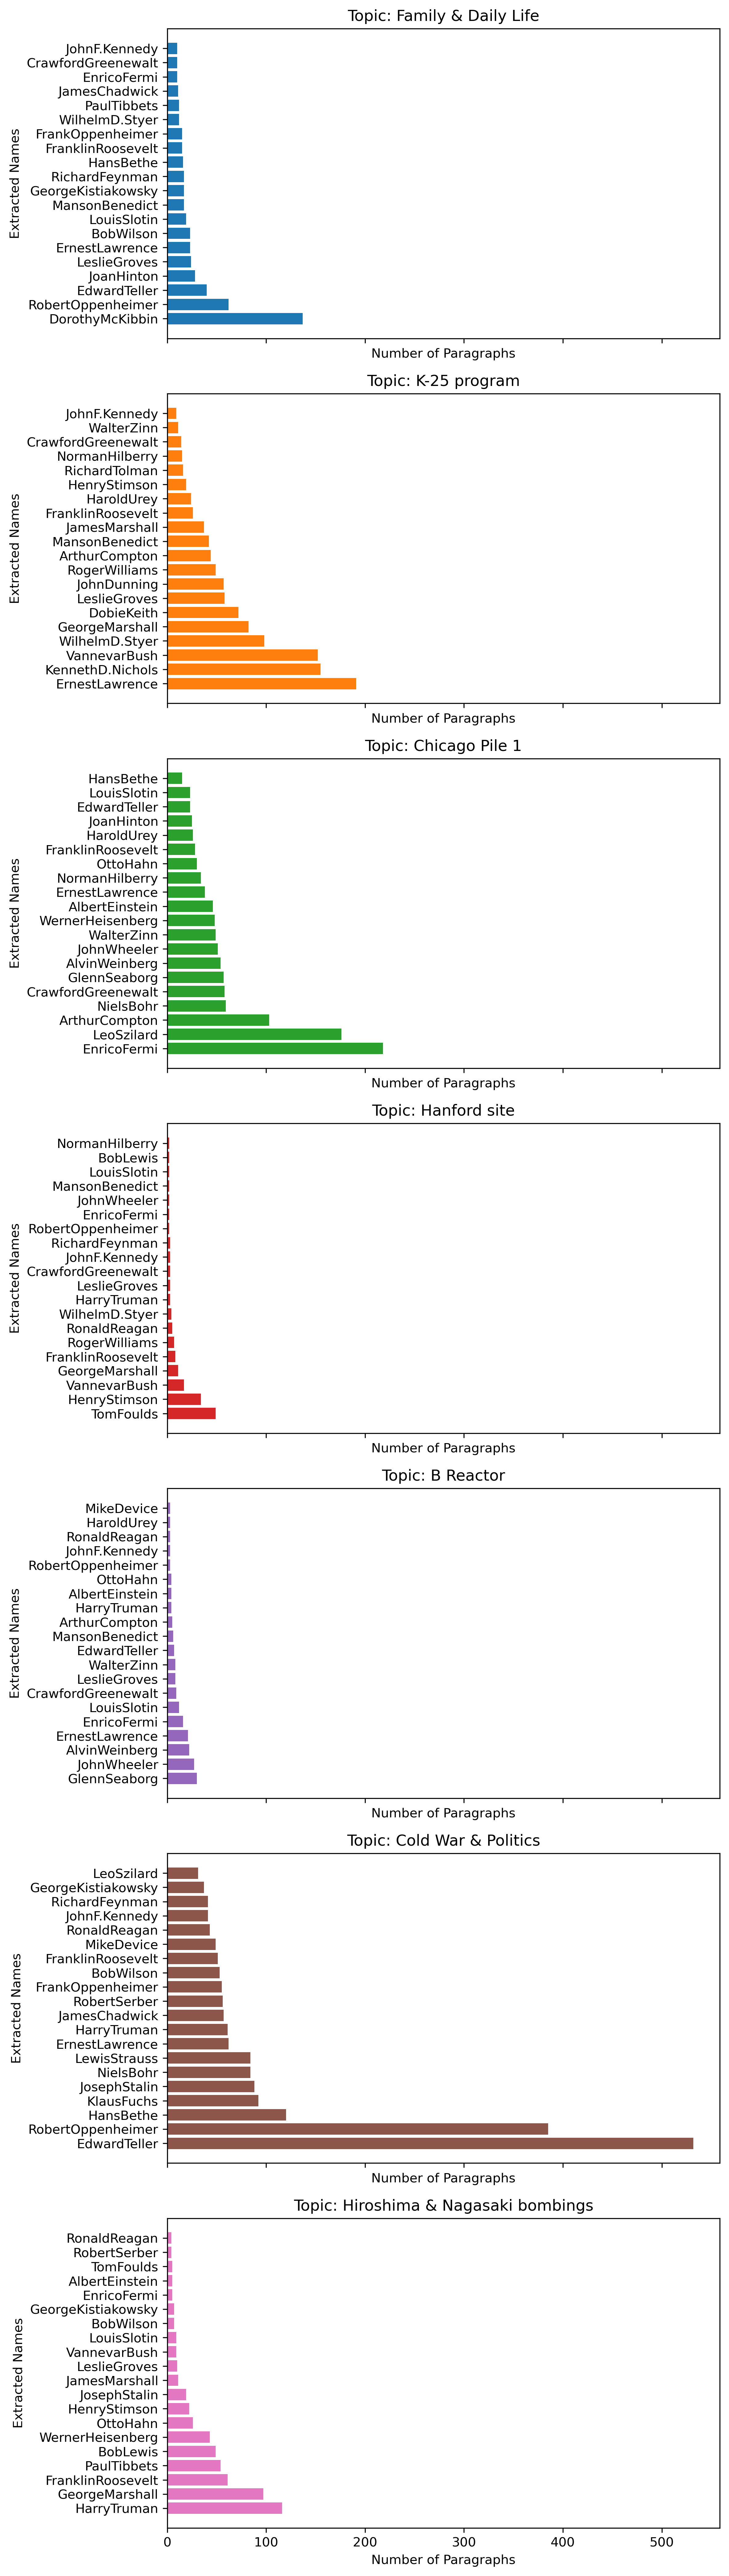

In [14]:
# Create a color palette for the subplots
colors = sns.color_palette('tab10', len(top_names_by_topic))

# Create a figure and axes
fig, axs = plt.subplots(len(top_names_by_topic), 1, figsize=(8, 4 * len(top_names_by_topic)), sharex=True)

# Iterate over each topic and its corresponding top names
for i, (topic, top_names) in enumerate(top_names_by_topic.items()):
    # Get the count of occurrences for the top names in the current topic
    counts = pivot_names_topics.loc[top_names, topic].tolist()
    
    # Create a horizontal bar plot with a specific color
    axs[i].barh(top_names, counts, color=colors[i])
    
    # Set plot labels and title
    axs[i].set_xlabel('Number of Paragraphs')
    axs[i].set_ylabel('Extracted Names')
    axs[i].set_title(f'Topic: {topic}')
        
plt.tight_layout()
plt.show()

---

In [15]:
# Drop duplicate names
profiles.drop_duplicates(subset=['name'], inplace=True, keep='first')

In [16]:
df = names_topics.merge(profiles, left_on='interviewee_x', right_on='name', how='left')
df.drop(columns=['name_y'], inplace=True)
df.rename(columns={'roles': 'interviewee_roles', 'interviewee_x': 'interviewee', 'name_x': 'name'}, inplace=True)
df['interviewee_roles'] = df['interviewee_roles'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)
df

interviewee  \
0                        Donald Ames   
1                        Donald Ames   
2                        Donald Ames   
3                        Donald Ames   
4                        Donald Ames   
...                              ...   
19784  Inge-Juliana Sackmann Christy   
19785  Inge-Juliana Sackmann Christy   
19786  Inge-Juliana Sackmann Christy   
19787  Inge-Juliana Sackmann Christy   
19788  Inge-Juliana Sackmann Christy   

                                                sentence  \
0      He did not work on radioactivity, but he was e...   
1      [Gilbert Newton] Lewis out there on acids and ...   
2                                              [John] J.   
3      The other secretary was to take notes on whate...   
4      Well, he didn’t, I mean his graduate student a...   
...                                                  ...   
19784        The man I went for was [Rudolf] Kippenhahn.   
19785  That’s where [Werner] Heisenberg was, that’s w...   
19786    [Adolf] Hitler and [Joseph] Stalin made a pact.   
19787                     Inge-Juliana Sackmann Christy.   
19788        And I’m with Inge-Juliana Sackmann Christy.   

                                               paragraph  paragraph_index  \
0      Now, as far as his treatment of the people. Be...            98173   
1      Now, as far as his treatment of the people. Be...            98173   
2      Now, as far as his treatment of the people. Be...            98173   
3      He had two secretaries. One secretary was for ...            98171   
4      Ames Well yeah, he discovered it. Well, he did...            98169   
...                                                  ...              ...   
19784  The man I went for was [Rudolf] Kippenhahn. Tu...               60   
19785  The Cambridge of Germany was always Gottingen....               59   
19786  The First World War was pretty lousy. Then cam...               14   
19787   Inge-Juliana Sackmann Christy. And should I s...                3   
19788   2019. I’m Cindy Kelly, and I’m in Pasadena, C...                2   

                              name  frequency  topic_7  topic_30  topic_90  \
0                   ErnestLawrence        336        3        10        25   
1               GilbertNewtonLewis          1        3        10        25   
2                           JohnJ.          1        3        10        25   
3                     GlennSeaborg        100        2        21        41   
4                    JohnF.Kennedy         84        3         5        59   
...                            ...        ...      ...       ...       ...   
19784             RudolfKippenhahn          1        6        13        34   
19785             WernerHeisenberg        125        3        17        40   
19786                 JosephStalin        109        6        17        48   
19787  Inge-JulianaSackmannChristy         16        1         1        13   
19788  Inge-JulianaSackmannChristy         16        1         9        17   

                                       interviewee_roles  
0      [Engineer, Manhattan Project Veteran, Military...  
1      [Engineer, Manhattan Project Veteran, Military...  
2      [Engineer, Manhattan Project Veteran, Military...  
3      [Engineer, Manhattan Project Veteran, Military...  
4      [Engineer, Manhattan Project Veteran, Military...  
...                                                  ...  
19784                          [Expert, Woman Scientist]  
19785                          [Expert, Woman Scientist]  
19786                          [Expert, Woman Scientist]  
19787                          [Expert, Woman Scientist]  
19788                          [Expert, Woman Scientist]  

[19789 rows x 10 columns]

In [17]:
df['interviewee_roles'].explode().value_counts()

Manhattan Project Veteran                     7353
Scientist                                     5196
Expert                                        2976
Project Worker/Staff                          1776
Engineer                                      1759
Military Veteran                              1687
Spouse to Manhattan Project Worker            1489
Trinity Test Eyewitness                       1231
Special Engineer Detachment                   1175
Postwar Nuclear Program                       1162
Family Member of Manhattan Project Veteran     963
Hydrogen Bomb                                  932
Nobel Prize Winner                             642
European Refugee                               630
Woman Scientist                                619
Pacific Nuclear Tests                          443
Hispano/a                                      417
Project Alberta                                266
Government Official                            253
509th Composite Group          

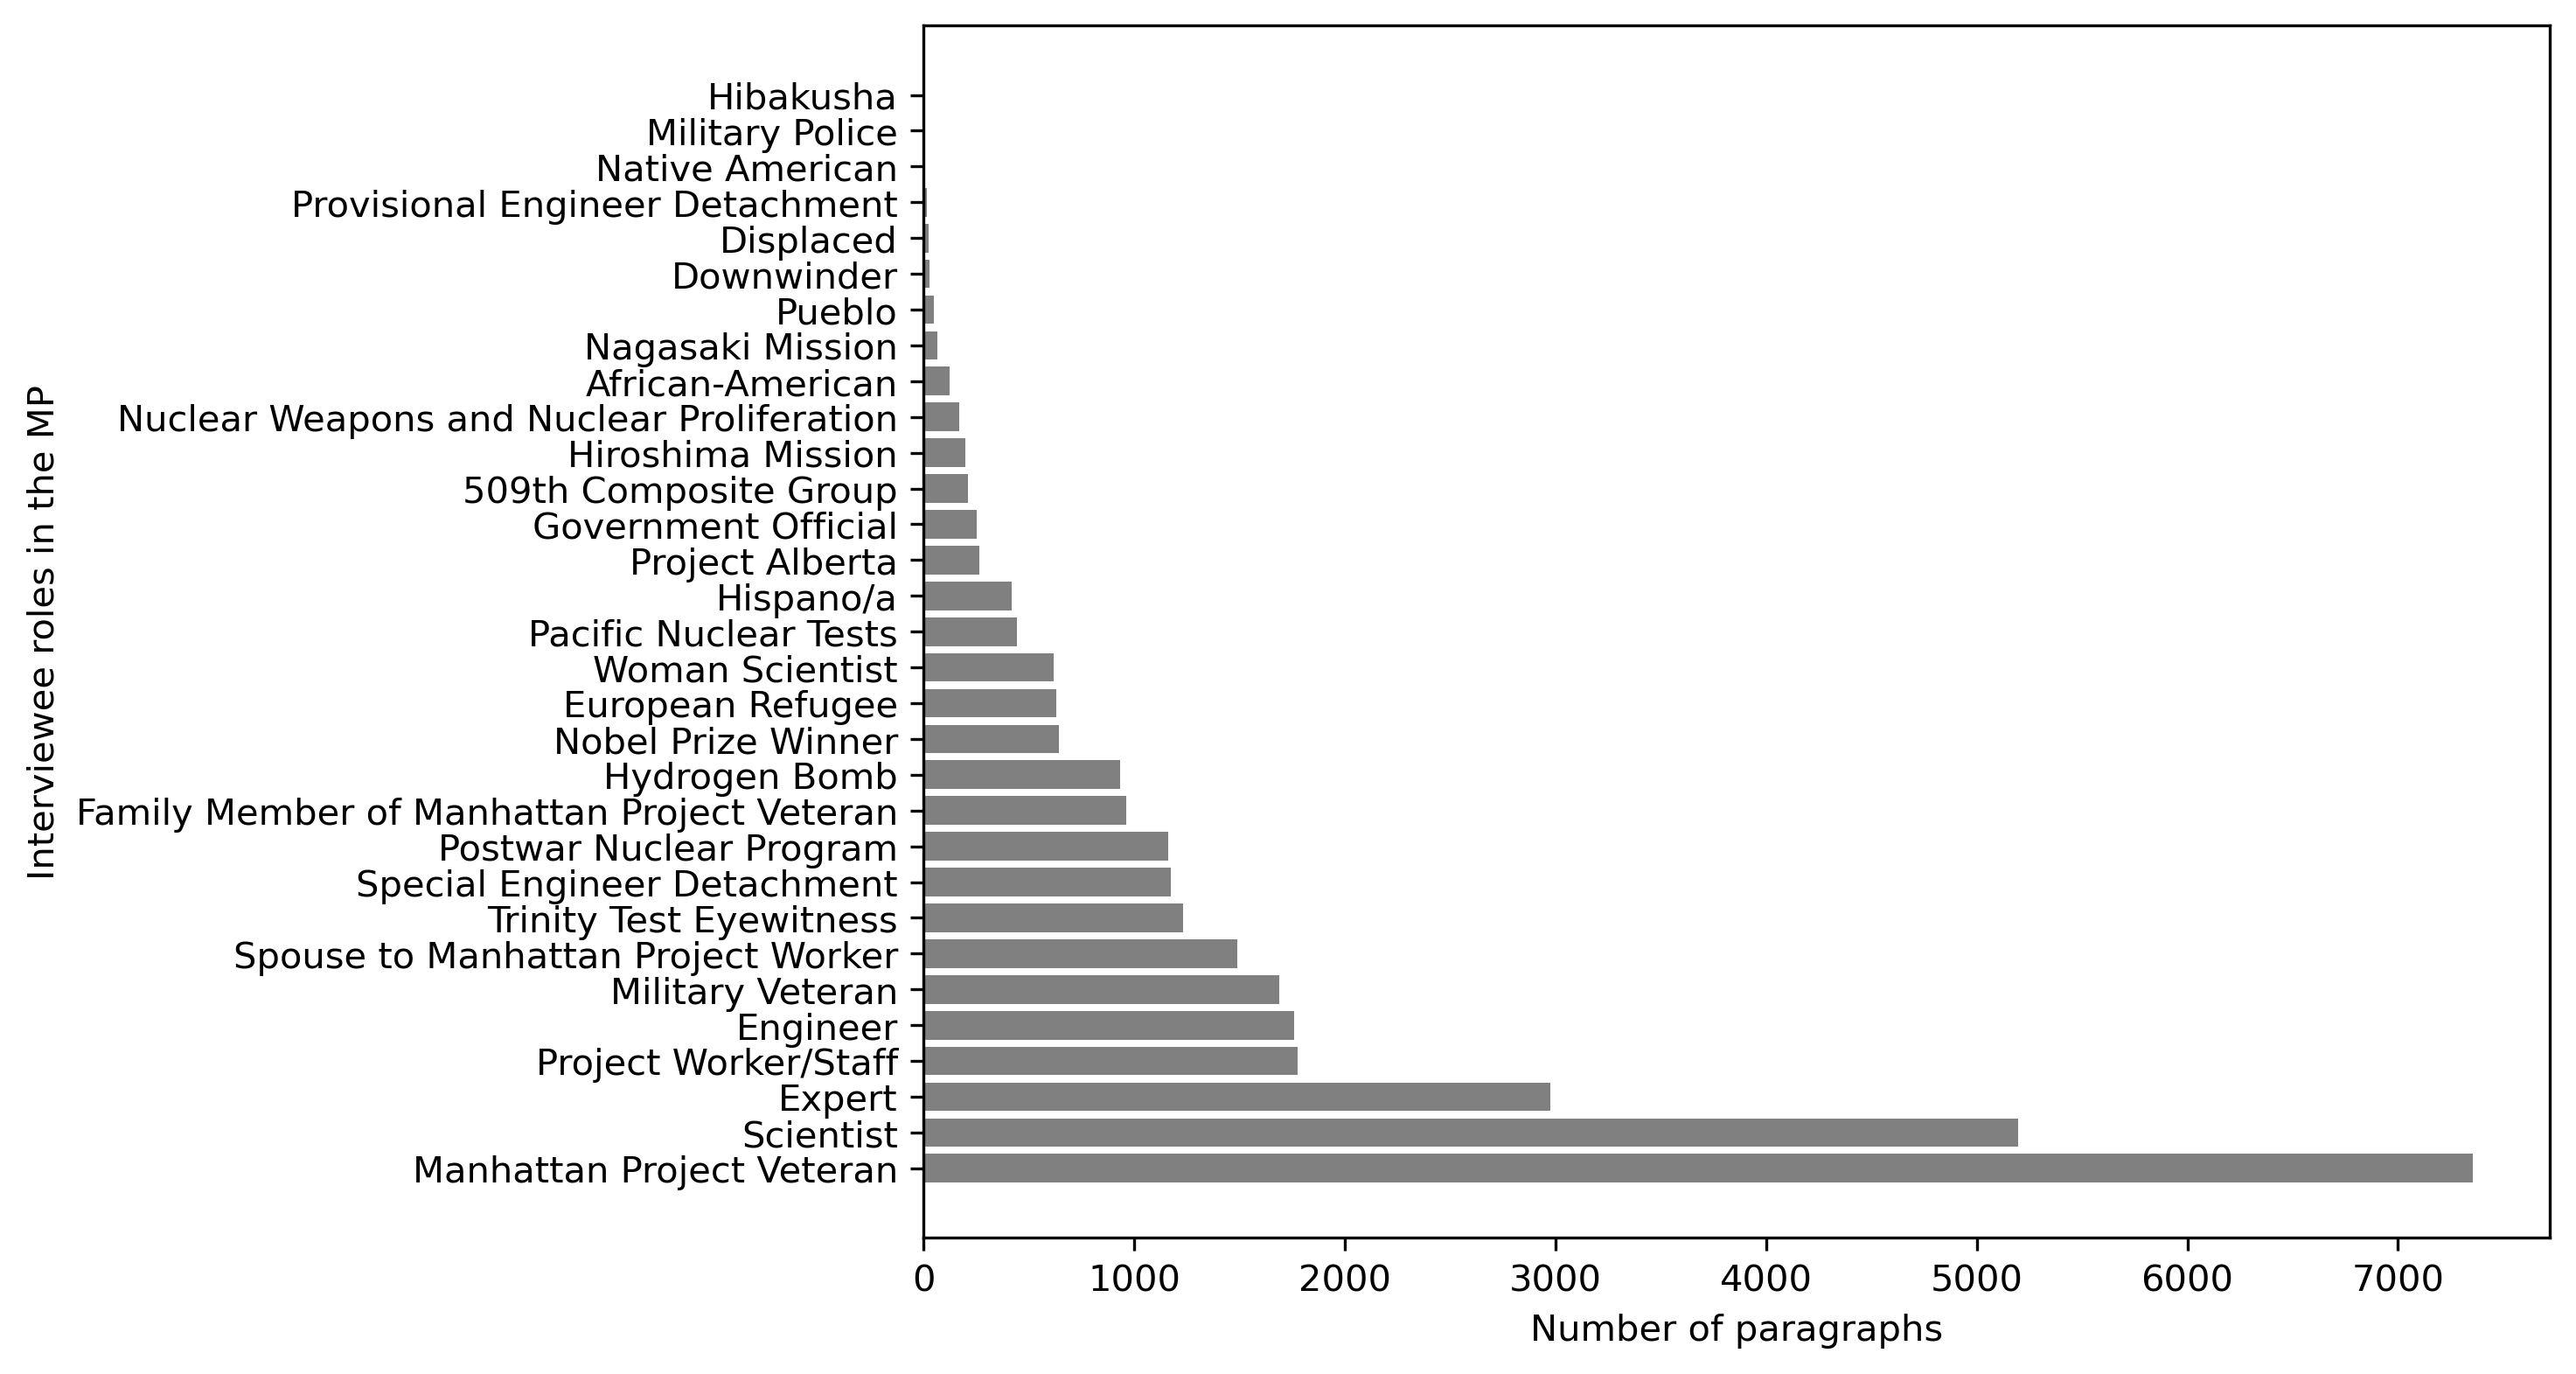

In [39]:
plt.figure(figsize=(8, 6))
plt.barh(df['interviewee_roles'].explode().value_counts().index, df['interviewee_roles'].explode().value_counts().values, color='grey')
# sns.barplot(x=df['interviewee_roles'].explode().value_counts().index,y=df['interviewee_roles'].explode().value_counts().values, palette='Greys')
plt.ylabel('Interviewee roles in the MP')
plt.xlabel('Number of paragraphs')
# plt.tick_params(axis='x', rotation=90)
plt.show()

In [21]:
veteran_df = df[df['interviewee_roles'].apply(lambda x: isinstance(x, list) and 'Manhattan Project Veteran' in x)]
scientist_df = df[df['interviewee_roles'].apply(lambda x: isinstance(x, list) and 'Scientist' in x)]
staff_df = df[df['interviewee_roles'].apply(lambda x: isinstance(x, list) and 'Project Worker/Staff' in x)]
engineer_df = df[df['interviewee_roles'].apply(lambda x: isinstance(x, list) and ('Engineer' in x or 'Special Engineer Detachment' in x or 'Provisional Engineer Detachment' in x))]
military_df = df[df['interviewee_roles'].apply(lambda x: isinstance(x, list) and ('Military Veteran' in x or 'Military Police' in x))]
woman_scientist_df = df[df['interviewee_roles'].apply(lambda x: isinstance(x, list) and 'Woman Scientist' in x)]
family_df = df[df['interviewee_roles'].apply(lambda x: isinstance(x, list) and ('Spouse to Manhattan Project Worker' in x or 'Family Member of Manhattan Project Veteran' in x))]
japan_df = df[df['interviewee_roles'].apply(lambda x: isinstance(x, list) and ('509th Composite Group' in x or 'Hiroshima Mission' in x or 'Nagasaki Mission' in x))]

In [22]:
veteran_value_counts = veteran_df['name'].value_counts()
scientist_value_counts = scientist_df['name'].value_counts()
staff_value_counts = staff_df['name'].value_counts()
engineer_value_counts = engineer_df['name'].value_counts()
military_value_counts = military_df['name'].value_counts()
woman_scientist_value_counts = woman_scientist_df['name'].value_counts()
family_value_counts = family_df['name'].value_counts()
japan_value_counts = japan_df['name'].value_counts()

In [23]:
# Create a dictionary with the value counts and corresponding hue
value_counts_dict = {
    'Manhattan Project Veteran': veteran_value_counts,
    'Scientist': scientist_value_counts,
    'Worker/Staff': staff_value_counts,
    'Engineer': engineer_value_counts,
    'Military': military_value_counts,
    'Woman Scientist': woman_scientist_value_counts,
    'Family Member': family_value_counts,
    'Hiroshima & Nagasaki bombings': japan_value_counts
}

# Create a dataframe from the dictionary
combined_value_counts = pd.DataFrame(value_counts_dict)

# Reset the index and rename it
combined_value_counts = combined_value_counts.reset_index().rename(columns={'index': 'Name'})

# Melt the dataframe to long format
combined_value_counts = combined_value_counts.melt(id_vars='Name', var_name='Interviewee Role', value_name='Value')

In [24]:
combined_value_counts

Name               Interviewee Role  Value
0          A.J.Connell      Manhattan Project Veteran    NaN
1                Aaron      Manhattan Project Veteran    1.0
2               Abbott      Manhattan Project Veteran    2.0
3      AbdulQadeerKhan      Manhattan Project Veteran    1.0
4            AbeFortas      Manhattan Project Veteran    NaN
...                ...                            ...    ...
26451       wasPearson  Hiroshima & Nagasaki bombings    NaN
26452         ÈveCurie  Hiroshima & Nagasaki bombings    NaN
26453       —BudWilson  Hiroshima & Nagasaki bombings    NaN
26454    —ByronJackson  Hiroshima & Nagasaki bombings    NaN
26455      —vonNeumann  Hiroshima & Nagasaki bombings    NaN

[26456 rows x 3 columns]

In [25]:
pivot_roles = combined_value_counts.pivot(index='Name', columns='Interviewee Role', values='Value').fillna(0).astype(int)

In [26]:
pivot_roles = pivot_roles.reindex(columns=value_counts_dict.keys())
pivot_roles

Interviewee Role  Manhattan Project Veteran  Scientist  Worker/Staff  \
Name                                                                   
A.J.Connell                               0          0             0   
Aaron                                     1          1             0   
Abbott                                    2          2             0   
AbdulQadeerKhan                           1          0             0   
AbeFortas                                 0          1             0   
...                                     ...        ...           ...   
wasPearson                                0          0             1   
ÈveCurie                                  0          1             0   
—BudWilson                                1          1             0   
—ByronJackson                             1          0             0   
—vonNeumann                               7          5             0   

Interviewee Role  Engineer  Military  Woman Scientist  Family Member  \
Name                                                                   
A.J.Connell              0         0                0              2   
Aaron                    1         1                0              0   
Abbott                   0         0                0              0   
AbdulQadeerKhan          1         0                0              0   
AbeFortas                0         0                0              0   
...                    ...       ...              ...            ...   
wasPearson               0         0                0              0   
ÈveCurie                 0         0                1              0   
—BudWilson               0         0                1              1   
—ByronJackson            1         0                0              0   
—vonNeumann              2         2                0              0   

Interviewee Role  Hiroshima & Nagasaki bombings  
Name                                             
A.J.Connell                                   0  
Aaron                                         0  
Abbott                                        0  
AbdulQadeerKhan                               0  
AbeFortas                                     0  
...                                         ...  
wasPearson                                    0  
ÈveCurie                                      0  
—BudWilson                                    0  
—ByronJackson                                 0  
—vonNeumann                                   0  

[3307 rows x 8 columns]

In [27]:
# Create an empty dictionary to store the top names for each topic
top_names_by_role = {}

# Iterate over each 'topic_7'
for topic in pivot_roles.columns:
    # Get the top 20 names for the current topic
    top_names = pivot_roles[topic].nlargest(20).index.tolist()
    
    # Store the top names in the dictionary
    top_names_by_role[topic] = top_names

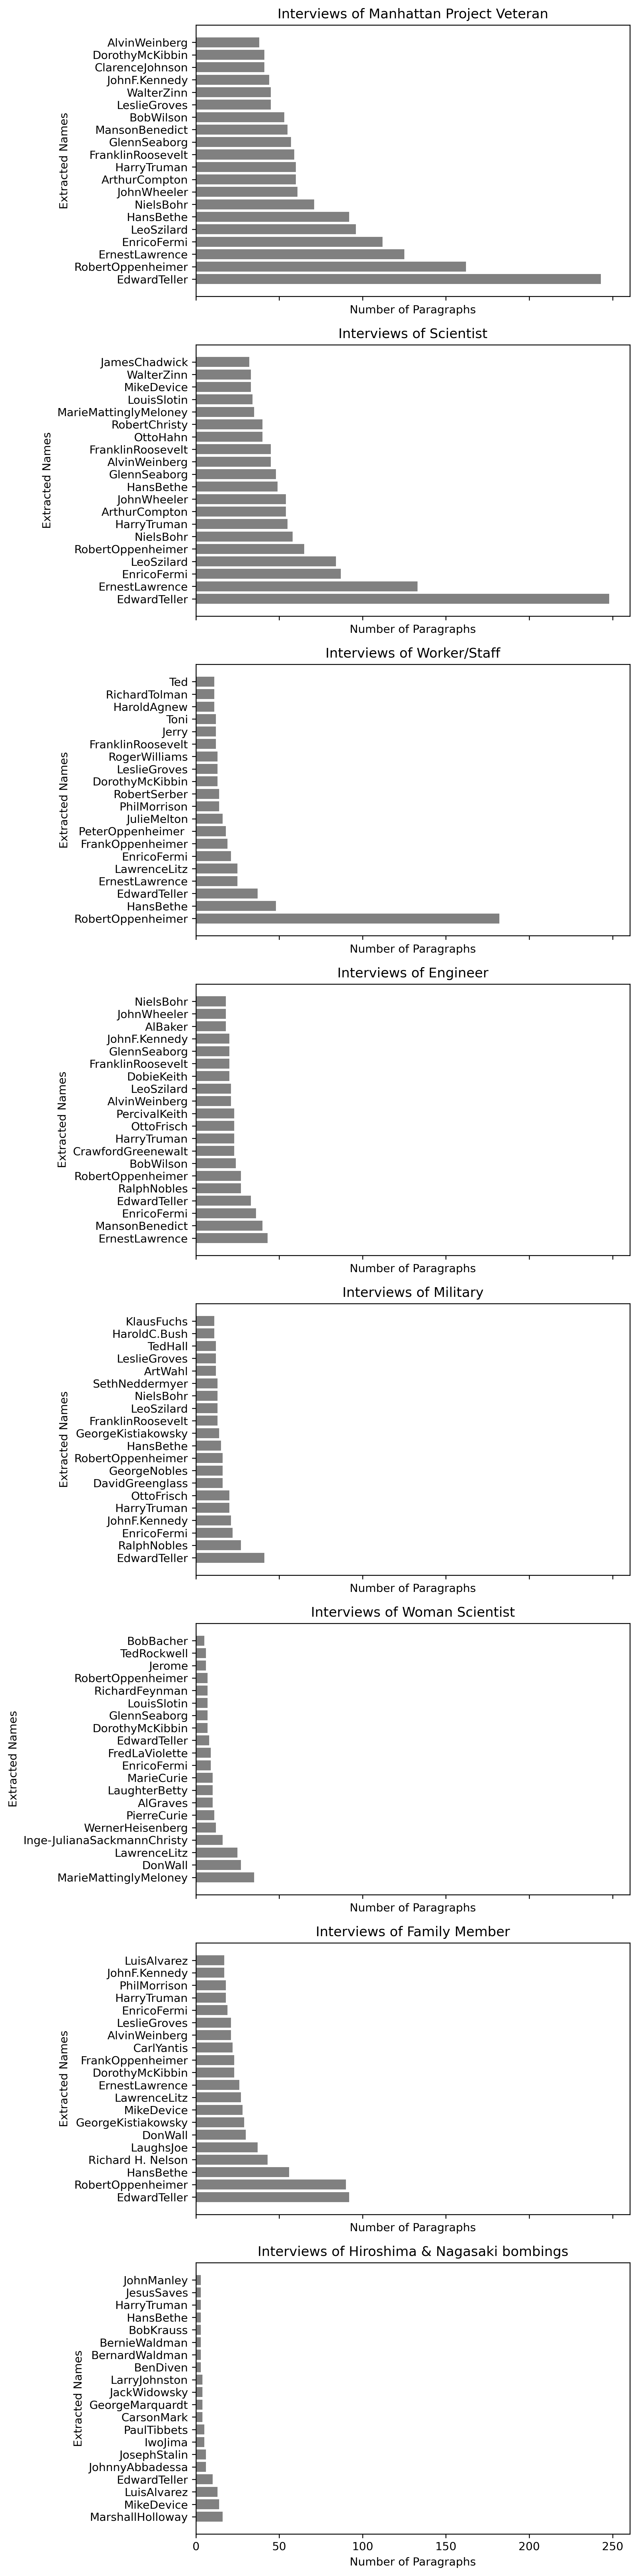

In [28]:
# Create a figure and axes
fig, axs = plt.subplots(len(top_names_by_role), 1, figsize=(8, 4 * len(top_names_by_role)), sharex=True)

# Iterate over each topic and its corresponding top names
for i, (topic, top_names) in enumerate(top_names_by_role.items()):
    # Get the count of occurrences for the top names in the current topic
    counts = pivot_roles.loc[top_names, topic].tolist()

    # Create a horizontal bar plot
    axs[i].barh(top_names, counts, color='grey')

    # Set plot labels and title
    axs[i].set_xlabel('Number of Paragraphs')
    axs[i].set_ylabel('Extracted Names')
    axs[i].set_title(f'Interviews of {topic}')

plt.tight_layout()
plt.show()

In [29]:
veteran_value_counts = veteran_df['topic_7'].value_counts()
scientist_value_counts = scientist_df['topic_7'].value_counts()
staff_value_counts = staff_df['topic_7'].value_counts()
engineer_value_counts = engineer_df['topic_7'].value_counts()
military_value_counts = military_df['topic_7'].value_counts()
woman_scientist_value_counts = woman_scientist_df['topic_7'].value_counts()
family_value_counts = family_df['topic_7'].value_counts()
japan_value_counts = japan_df['topic_7'].value_counts()

In [30]:
# Create a dictionary with the value counts and corresponding hue
value_counts_dict = {
    'Manhattan Project Veteran': veteran_value_counts,
    'Scientist': scientist_value_counts,
    'Worker/Staff': staff_value_counts,
    'Engineer': engineer_value_counts,
    'Military': military_value_counts,
    'Woman Scientist': woman_scientist_value_counts,
    'Family Member': family_value_counts,
    'Hiroshima & Nagasaki bombings': japan_value_counts
}

# Create a dataframe from the dictionary
combined_value_counts = pd.DataFrame(value_counts_dict)

# Reset the index and rename it
combined_value_counts = combined_value_counts.reset_index().rename(columns={'index': 'Topic'})

# Melt the dataframe to long format
combined_value_counts = combined_value_counts.melt(id_vars='Topic', var_name='Interviewee Role', value_name='Value')

combined_value_counts = combined_value_counts.replace({'Topic': topic_labels})

In [31]:
combined_value_counts

Topic               Interviewee Role  Value
0             Family & Daily Life      Manhattan Project Veteran   2039
1                    K-25 program      Manhattan Project Veteran   1157
2                  Chicago Pile 1      Manhattan Project Veteran   1324
3                    Hanford site      Manhattan Project Veteran    233
4                       B Reactor      Manhattan Project Veteran    398
5             Cold War & Politics      Manhattan Project Veteran   1804
6   Hiroshima & Nagasaki bombings      Manhattan Project Veteran    398
7             Family & Daily Life                      Scientist    985
8                    K-25 program                      Scientist    651
9                  Chicago Pile 1                      Scientist   1154
10                   Hanford site                      Scientist     97
11                      B Reactor                      Scientist    381
12            Cold War & Politics                      Scientist   1694
13  Hiroshima & Nagasaki bombings                      Scientist    234
14            Family & Daily Life                   Worker/Staff    673
15                   K-25 program                   Worker/Staff    179
16                 Chicago Pile 1                   Worker/Staff    142
17                   Hanford site                   Worker/Staff     94
18                      B Reactor                   Worker/Staff     57
19            Cold War & Politics                   Worker/Staff    568
20  Hiroshima & Nagasaki bombings                   Worker/Staff     63
21            Family & Daily Life                       Engineer    692
22                   K-25 program                       Engineer    625
23                 Chicago Pile 1                       Engineer    412
24                   Hanford site                       Engineer    130
25                      B Reactor                       Engineer    200
26            Cold War & Politics                       Engineer    386
27  Hiroshima & Nagasaki bombings                       Engineer    160
28            Family & Daily Life                       Military    581
29                   K-25 program                       Military    157
30                 Chicago Pile 1                       Military    239
31                   Hanford site                       Military     68
32                      B Reactor                       Military     66
33            Cold War & Politics                       Military    350
34  Hiroshima & Nagasaki bombings                       Military    232
35            Family & Daily Life                Woman Scientist    247
36                   K-25 program                Woman Scientist     24
37                 Chicago Pile 1                Woman Scientist    142
38                   Hanford site                Woman Scientist      7
39                      B Reactor                Woman Scientist     40
40            Cold War & Politics                Woman Scientist    128
41  Hiroshima & Nagasaki bombings                Woman Scientist     31
42            Family & Daily Life                  Family Member   1092
43                   K-25 program                  Family Member     99
44                 Chicago Pile 1                  Family Member    282
45                   Hanford site                  Family Member     71
46                      B Reactor                  Family Member     58
47            Cold War & Politics                  Family Member    701
48  Hiroshima & Nagasaki bombings                  Family Member    149
49            Family & Daily Life  Hiroshima & Nagasaki bombings     45
50                   K-25 program  Hiroshima & Nagasaki bombings     29
51                 Chicago Pile 1  Hiroshima & Nagasaki bombings     17
52                   Hanford site  Hiroshima & Nagasaki bombings      2
53                      B Reactor  Hiroshima & Nagasaki bombings     12
54            Cold War & Politics  Hiroshima & Nagasaki bombings    

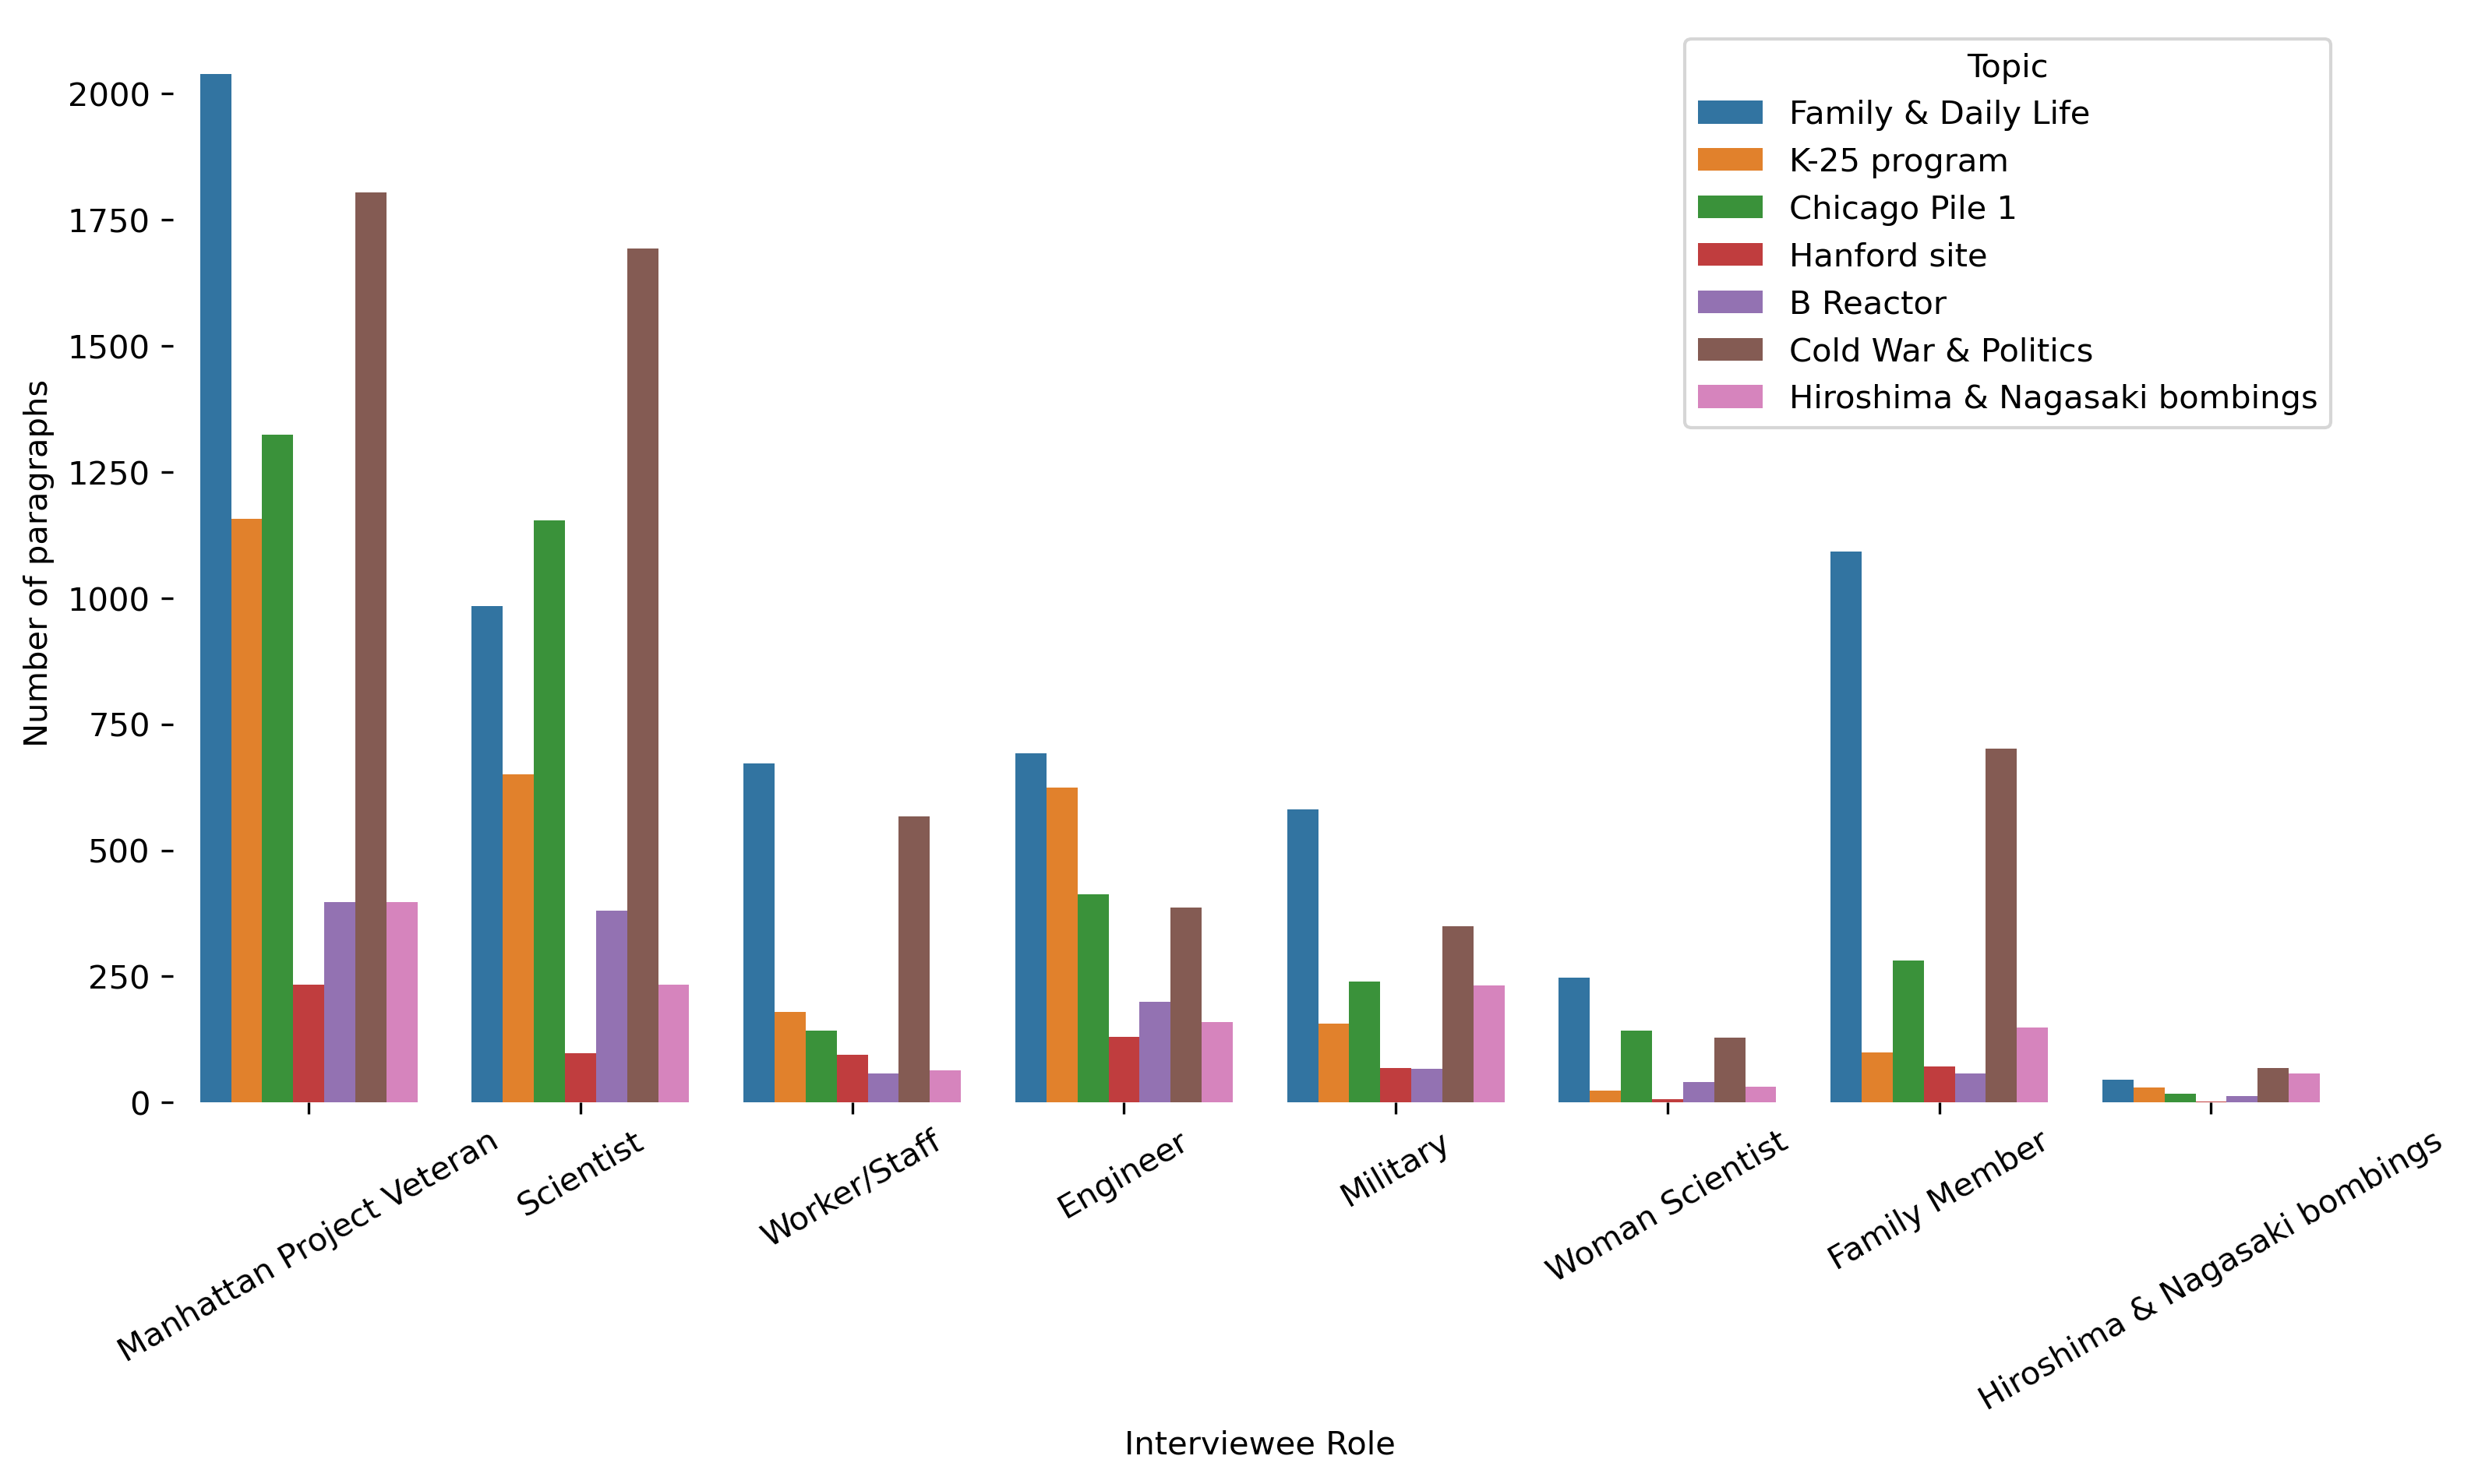

In [32]:
# Plotting the grouped bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='Interviewee Role', y='Value', hue='Topic', data=combined_value_counts, palette=sns.color_palette('tab10', 7))

plt.xlabel('Interviewee Role')
plt.ylabel('Number of paragraphs')
plt.tick_params(axis='x', rotation=30)
plt.box(False)
plt.show()